In [40]:
!pip install XGBoost --quiet

In [41]:
!pip install shap

In [42]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import shap
shap.initjs()
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [43]:
canada_df = pd.read_csv('/content/drive/MyDrive/linkedin-jobs-canada.csv')
usa_df = pd.read_csv('/content/drive/MyDrive/linkedin-jobs-usa.csv')
africa_df = pd.read_csv('/content/drive/MyDrive/linkedin-jobs-africa.csv')
canada_df['Country'] = 'Canada'
usa_df['Country'] = 'USA'
africa_df['Country'] = 'Africa'
combined_df = pd.concat([canada_df, usa_df, africa_df], ignore_index=True)

combined_df.to_csv('/content/drive/MyDrive/linkedin_combined.csv', index=False)


In [44]:
df=pd.read_csv('/content/drive/MyDrive/linkedin_combined.csv')

In [45]:
df.head()

,title,company,description,onsite_remote,salary,location,criteria,posted_date,link,Country
0,Data Analyst,Axonify,Axonify is an intelligent workforce enablement...,onsite,NaN,"Waterloo, Ontario, Canada","[{'Seniority level': 'Entry level'}, {'Employm...",2022-10-24,https://ca.linkedin.com/jobs/view/data-analyst...,Canada
1,Data Analyst,B3 Systems,The ideal candidate will use their passion for...,onsite,NaN,"Toronto, Ontario, Canada",[{'Employment type': 'Full-time'}],2022-11-18,https://ca.linkedin.com/jobs/view/data-analyst...,Canada
2,Data Analyst,Wood Mackenzie,Company DescriptionWood Mackenzie is the globa...,onsite,NaN,"Calgary, Alberta, Canada","[{'Seniority level': 'Associate'}, {'Employmen...",2022-11-18,https://ca.linkedin.com/jobs/view/data-analyst...,Canada
3,Data Analyst,LOFT Community Services,1 Part Time Permanent PositionDATE: November 1...,onsite,NaN,"Toronto, Ontario, Canada",[{'Employment type': 'Part-time'}],2022-11-17,https://ca.linkedin.com/jobs/view/data-analyst...,Canada
4,Data Analyst,NAM Info Inc,"Position: Data AnalystWork Locations: Toronto,...",onsite,NaN,"Toronto, Ontario, Canada","[{'Seniority level': 'Mid-Senior level'}, {'Em...",2022-11-08,https://ca.linkedin.com/jobs/view/data-analyst...,Canada


In [46]:
len(df)

8490

In [47]:
df[df['salary'].notna()]

,title,company,description,onsite_remote,salary,location,criteria,posted_date,link,Country
977,Data Analyst,Libitzky Property Companies,"Using its own equity, LPC continues to build o...",remote,"$135,000.00\r\n -\r\n $1...",Canada,"[{'Seniority level': 'Entry level'}, {'Employm...",2022-09-28,https://ca.linkedin.com/jobs/view/data-analyst...,Canada
999,Data Analyst,Libitzky Property Companies,"Using its own equity, LPC continues to build o...",remote,"$135,000.00\r\n -\r\n $1...",Canada,"[{'Seniority level': 'Entry level'}, {'Employm...",2022-09-28,https://ca.linkedin.com/jobs/view/data-analyst...,Canada
1021,Data Analyst,Libitzky Property Companies,"Using its own equity, LPC continues to build o...",remote,"$135,000.00\r\n -\r\n $1...",Canada,"[{'Seniority level': 'Entry level'}, {'Employm...",2022-09-28,https://ca.linkedin.com/jobs/view/data-analyst...,Canada
1043,Data Analyst,Libitzky Property Companies,"Using its own equity, LPC continues to build o...",remote,"$135,000.00\r\n -\r\n $1...",Canada,"[{'Seniority level': 'Entry level'}, {'Employm...",2022-09-28,https://ca.linkedin.com/jobs/view/data-analyst...,Canada
1065,Data Analyst,Libitzky Property Companies,"Using its own equity, LPC continues to build o...",remote,"$135,000.00\r\n -\r\n $1...",Canada,"[{'Seniority level': 'Entry level'}, {'Employm...",2022-09-28,https://ca.linkedin.com/jobs/view/data-analyst...,Canada
...,...,...,...,...,...,...,...,...,...,...
5607,Junior Data Analyst,Insight Global,"This is a One Year Contract to Hire, 40 hours ...",hybrid,$30.00\r\n -\r\n $33.00,Denver Metropolitan Area,"[{'Seniority level': 'Entry level'}, {'Employm...",2022-11-16,https://www.linkedin.com/jobs/view/junior-data...,USA
5609,Data Analyst,Gridiron IT,Gridiron IT is seeking a Data Analyst local to...,hybrid,"$120,000.00\r\n -\r\n $1...","District of Columbia, United States","[{'Seniority level': 'Associate'}, {'Employmen...",2022-11-04,https://www.linkedin.com/jobs/view/data-analys...,USA
5614,Data Analyst (SQL),Marwood Group,The Marwood Group (Marwood) is a leading healt...,hybrid,"$75,000.00\r\n -\r\n $95...",New York City Metropolitan Area,"[{'Seniority level': 'Mid-Senior level'}, {'Em...",2022-10-26,https://www.linkedin.com/jobs/view/data-analys...,USA
5616,Data Analyst,Synergy Search,Nashville (Berry Hill) based company looking t...,hybrid,"$85,000.00\r\n -\r\n $95...",Nashville Metropolitan Area,"[{'Seniority level': 'Not Applicable'}, {'Empl...",2022-11-14,https://www.linkedin.com/jobs/view/data-analys...,USA


###Lets extract the min salary and max salary from salary column which has values in it.We can use parse_salary() function here that uses re module in python for regular expressions that we can get pattern matching in strings.


In [48]:
def parse_salary(s):
    if pd.isna(s):
        return pd.Series([None, None])

    # Step 1: Remove all newlines and extra spaces
    s = re.sub(r'\s+', '', s)  # This removes \r\n and all spaces

    # Step 2: Extract numbers with optional decimal
    matches = re.findall(r'[\$€£]?([\d,]+(?:\.\d+)?)', s)

    if len(matches) == 2:
        min_sal = float(matches[0].replace(',', ''))
        max_sal = float(matches[1].replace(',', ''))
    elif len(matches) == 1:
        min_sal = max_sal = float(matches[0].replace(',', ''))
    else:
        return pd.Series([None, None])

    return pd.Series([min_sal, max_sal])

# Apply to your DataFrame
df[['min_salary', 'max_salary']] = df['salary'].apply(parse_salary)

In [49]:
df[['salary', 'min_salary', 'max_salary']].dropna()



,salary,min_salary,max_salary
977,"$135,000.00\r\n -\r\n $1...",135000.0,140000.0
999,"$135,000.00\r\n -\r\n $1...",135000.0,140000.0
1021,"$135,000.00\r\n -\r\n $1...",135000.0,140000.0
1043,"$135,000.00\r\n -\r\n $1...",135000.0,140000.0
1065,"$135,000.00\r\n -\r\n $1...",135000.0,140000.0
...,...,...,...
5607,$30.00\r\n -\r\n $33.00,30.0,33.0
5609,"$120,000.00\r\n -\r\n $1...",120000.0,130000.0
5614,"$75,000.00\r\n -\r\n $95...",75000.0,95000.0
5616,"$85,000.00\r\n -\r\n $95...",85000.0,95000.0


###We have to fill out the remaining null values in salaries. we can use statistics methods such as mean, median, average, mode or standard deviation to fill the missing values. but it wouldn't be effecient. Therefore we will use machine learning to fill the values. As we know Regression would be best choice for predicting continuous values, that method should obey the scalability,having interpretability,Robustness to Noise,better accuracy and speed and simple.

##I choose XGBoost Regression Model for prediction of remaining salaries as it gives high accuracy, Handles missing data, it works with mixed features like categorial + numeric ,it handles millions of rows effectively,and avoids overfitting and handles sparse data

##Lets train 2 seperate XGBoost models, one for max_salary and other for min_salary

In [50]:
df.columns

Index(['title', 'company', 'description', 'onsite_remote', 'salary',
       'location', 'criteria', 'posted_date', 'link', 'Country', 'min_salary',
       'max_salary'],
      dtype='object')

###Let us combine max and min salaries with mean as new column 'avgsalary' for modeling

In [51]:
df['avg_salary']=df[['min_salary','max_salary']].mean(axis=1)

In [52]:
#lets define train and test dataframes by splitting them
features = ['title','company','onsite_remote','location','Country']
target ='avg_salary'

train_df = df[df[target].notnull()]
test_df=df[df[target].isnull()]

In [53]:
#oneHot encode categorial features

X_train = pd.get_dummies(train_df[features])
X_test=pd.get_dummies(test_df[features])
#ensuring same columns in test and train
X_test = X_test.reindex(columns=X_train.columns,fill_value=0)
y_train = train_df[target]


In [54]:
#initializing the model
xgb = XGBRegressor(n_estimators=100,learning_rate = 0.1,random_state = 42)
xgb.fit(X_train,y_train)

#predicting the missing salaries
predicted_salaries = xgb.predict(X_test)

#filling values in original df
df.loc[df[target].isnull(),target]= predicted_salaries

In [55]:
#Lets fill the min max salaries
df['min_salary'] = df['min_salary'].fillna(df['avg_salary'] * 0.96)
df['max_salary'] = df['max_salary'].fillna(df['avg_salary'] * 1.04)
#let us assume 96% of avg salary is minimum and 104% of avg salary is maximum


##Datafset modifications


In [56]:
df

,title,company,description,onsite_remote,salary,location,criteria,posted_date,link,Country,min_salary,max_salary,avg_salary
0,Data Analyst,Axonify,Axonify is an intelligent workforce enablement...,onsite,NaN,"Waterloo, Ontario, Canada","[{'Seniority level': 'Entry level'}, {'Employm...",2022-10-24,https://ca.linkedin.com/jobs/view/data-analyst...,Canada,82020.99000,88856.072500,85438.531250
1,Data Analyst,B3 Systems,The ideal candidate will use their passion for...,onsite,NaN,"Toronto, Ontario, Canada",[{'Employment type': 'Full-time'}],2022-11-18,https://ca.linkedin.com/jobs/view/data-analyst...,Canada,82020.99000,88856.072500,85438.531250
2,Data Analyst,Wood Mackenzie,Company DescriptionWood Mackenzie is the globa...,onsite,NaN,"Calgary, Alberta, Canada","[{'Seniority level': 'Associate'}, {'Employmen...",2022-11-18,https://ca.linkedin.com/jobs/view/data-analyst...,Canada,82020.99000,88856.072500,85438.531250
3,Data Analyst,LOFT Community Services,1 Part Time Permanent PositionDATE: November 1...,onsite,NaN,"Toronto, Ontario, Canada",[{'Employment type': 'Part-time'}],2022-11-17,https://ca.linkedin.com/jobs/view/data-analyst...,Canada,82020.99000,88856.072500,85438.531250
4,Data Analyst,NAM Info Inc,"Position: Data AnalystWork Locations: Toronto,...",onsite,NaN,"Toronto, Ontario, Canada","[{'Seniority level': 'Mid-Senior level'}, {'Em...",2022-11-08,https://ca.linkedin.com/jobs/view/data-analyst...,Canada,82020.99000,88856.072500,85438.531250
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8485,BI Data Analyst,Mindworx Consulting and Academy,12-Month Renewable ContractJob PurposeTo ensur...,hybrid,NaN,Johannesburg Metropolitan Area,[{'Employment type': 'Contract'}],2022-11-23,https://za.linkedin.com/jobs/view/bi-data-anal...,Africa,14327.16375,15521.094063,14924.128906
8486,Data Analysis and Data Expert,Orange Business Services,Responsibilities: Ensure accuracy and data qua...,hybrid,NaN,"Cairo, Egypt","[{'مستوى الأقدمية': 'مستوى متوسط الأقدمية'}, {...",2022-11-15,https://eg.linkedin.com/jobs/view/data-analysi...,Africa,14327.16375,15521.094063,14924.128906
8487,Web Data Analyst,"Niufitel, S.L.",Digital Data AnalystA brand-new and exciting o...,hybrid,NaN,"South East, South-East District, Botswana","[{'Seniority level': 'Entry level'}, {'Employm...",2022-11-13,https://bw.linkedin.com/jobs/view/web-data-ana...,Africa,14327.16375,15521.094063,14924.128906
8488,ETL and Data Quality Analyst,Vodafone,Role PurposeThe role is key for sourcing data ...,hybrid,NaN,"Accra, Greater Accra Region, Ghana","[{'Seniority level': 'Not Applicable'}, {'Empl...",2022-11-22,https://gh.linkedin.com/jobs/view/etl-and-data...,Africa,14327.16375,15521.094063,14924.128906


###now, we can drop the avg salary column and remove decimals of min and max salaries.

In [57]:
df['min_salary'] = df['min_salary'].round(0).astype('Int64')
df['max_salary'] = df['max_salary'].round(0).astype('Int64')




In [58]:
df

,title,company,description,onsite_remote,salary,location,criteria,posted_date,link,Country,min_salary,max_salary,avg_salary
0,Data Analyst,Axonify,Axonify is an intelligent workforce enablement...,onsite,NaN,"Waterloo, Ontario, Canada","[{'Seniority level': 'Entry level'}, {'Employm...",2022-10-24,https://ca.linkedin.com/jobs/view/data-analyst...,Canada,82021,88856,85438.531250
1,Data Analyst,B3 Systems,The ideal candidate will use their passion for...,onsite,NaN,"Toronto, Ontario, Canada",[{'Employment type': 'Full-time'}],2022-11-18,https://ca.linkedin.com/jobs/view/data-analyst...,Canada,82021,88856,85438.531250
2,Data Analyst,Wood Mackenzie,Company DescriptionWood Mackenzie is the globa...,onsite,NaN,"Calgary, Alberta, Canada","[{'Seniority level': 'Associate'}, {'Employmen...",2022-11-18,https://ca.linkedin.com/jobs/view/data-analyst...,Canada,82021,88856,85438.531250
3,Data Analyst,LOFT Community Services,1 Part Time Permanent PositionDATE: November 1...,onsite,NaN,"Toronto, Ontario, Canada",[{'Employment type': 'Part-time'}],2022-11-17,https://ca.linkedin.com/jobs/view/data-analyst...,Canada,82021,88856,85438.531250
4,Data Analyst,NAM Info Inc,"Position: Data AnalystWork Locations: Toronto,...",onsite,NaN,"Toronto, Ontario, Canada","[{'Seniority level': 'Mid-Senior level'}, {'Em...",2022-11-08,https://ca.linkedin.com/jobs/view/data-analyst...,Canada,82021,88856,85438.531250
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8485,BI Data Analyst,Mindworx Consulting and Academy,12-Month Renewable ContractJob PurposeTo ensur...,hybrid,NaN,Johannesburg Metropolitan Area,[{'Employment type': 'Contract'}],2022-11-23,https://za.linkedin.com/jobs/view/bi-data-anal...,Africa,14327,15521,14924.128906
8486,Data Analysis and Data Expert,Orange Business Services,Responsibilities: Ensure accuracy and data qua...,hybrid,NaN,"Cairo, Egypt","[{'مستوى الأقدمية': 'مستوى متوسط الأقدمية'}, {...",2022-11-15,https://eg.linkedin.com/jobs/view/data-analysi...,Africa,14327,15521,14924.128906
8487,Web Data Analyst,"Niufitel, S.L.",Digital Data AnalystA brand-new and exciting o...,hybrid,NaN,"South East, South-East District, Botswana","[{'Seniority level': 'Entry level'}, {'Employm...",2022-11-13,https://bw.linkedin.com/jobs/view/web-data-ana...,Africa,14327,15521,14924.128906
8488,ETL and Data Quality Analyst,Vodafone,Role PurposeThe role is key for sourcing data ...,hybrid,NaN,"Accra, Greater Accra Region, Ghana","[{'Seniority level': 'Not Applicable'}, {'Empl...",2022-11-22,https://gh.linkedin.com/jobs/view/etl-and-data...,Africa,14327,15521,14924.128906


##We can split the dataset into training and validation sets from the original 965 rows that had actual values , from which we got min_salary and max_salary.
* Mean Absolute Error
* Root Mean Square Error
* R^2 Score

In [59]:
# Splitting for evaluation only — using original known min and max salaries
X_train_eval, X_val_eval, y_train_eval, y_val_eval = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Train and predict
xgb_eval = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb_eval.fit(X_train_eval, y_train_eval)
y_pred_eval = xgb_eval.predict(X_val_eval)

# Evaluate
mae = mean_absolute_error(y_val_eval, y_pred_eval)
rmse = np.sqrt(mean_squared_error(y_val_eval, y_pred_eval))
r2 = r2_score(y_val_eval, y_pred_eval)

print(f"MAE: ${mae:.2f}")
print(f"RMSE: ${rmse:.2f}")
print(f"R² Score: {r2:.4f}")


MAE: $4342.25
RMSE: $7352.96
R² Score: 0.9795


##Scatter Plot : Actual vs predicted salary

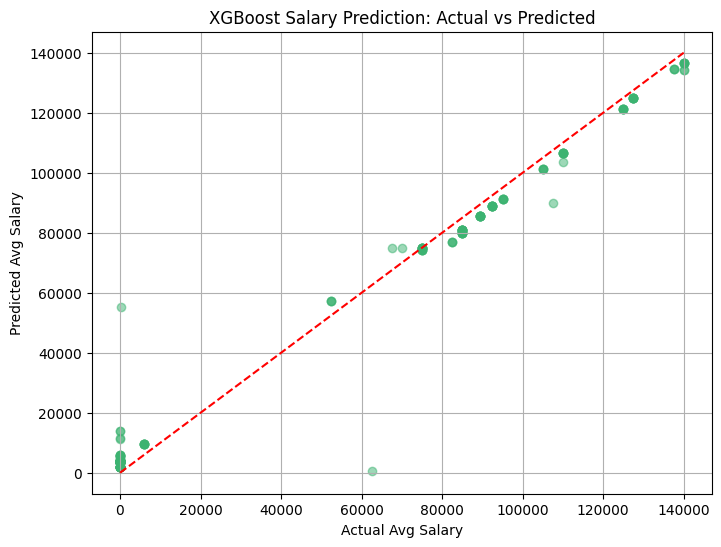

In [60]:
plt.figure(figsize=(8, 6))
plt.scatter(y_val_eval, y_pred_eval, alpha=0.5, color='mediumseagreen')
plt.plot([y_val_eval.min(), y_val_eval.max()], [y_val_eval.min(), y_val_eval.max()], 'r--')
plt.xlabel("Actual Avg Salary")
plt.ylabel("Predicted Avg Salary")
plt.title("XGBoost Salary Prediction: Actual vs Predicted")
plt.grid(True)
plt.show()


##Feature chart

##XGBoost Regression shows how often or how effectively a feature was used in the trees.

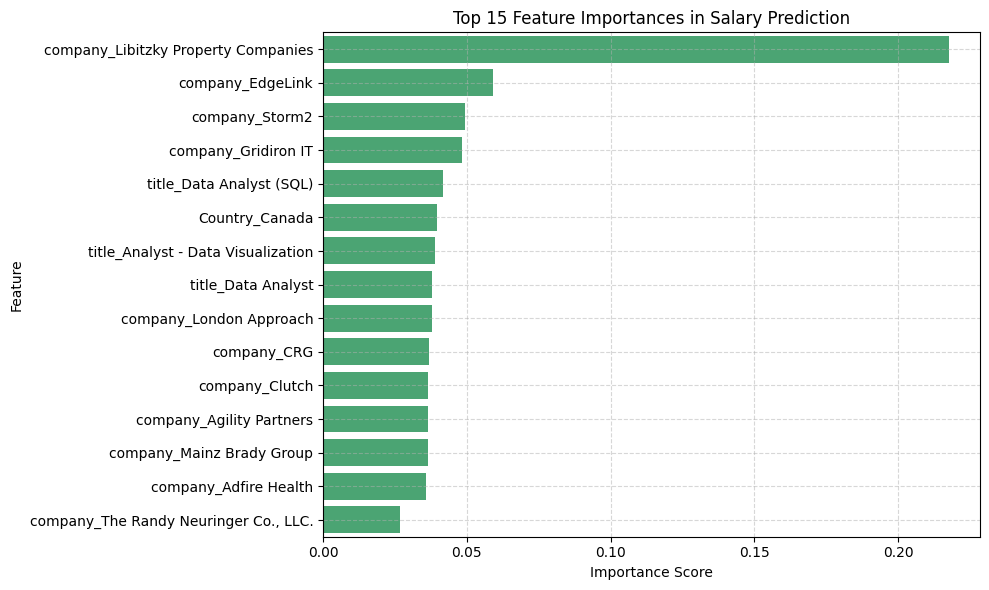

In [61]:
importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': xgb_eval.feature_importances_
}).sort_values(by='Importance', ascending=False).head(15)
plt.figure(figsize=(10, 6))
sns.barplot(data=importance_df, x='Importance', y='Feature', color='mediumseagreen')
plt.title("Top 15 Feature Importances in Salary Prediction")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


In [62]:
df.drop(columns='avg_salary',inplace=True)
df.drop(columns='salary',inplace=True)

##Bar chart (histogram): shows frequency of salary values in bins.
###Two "S"-shaped lines: these are KDE curves (Kernel Density Estimation), which estimate the distribution smoothly for:

* #### Actual salaries (blue)

* #### Predicted salaries (orange)


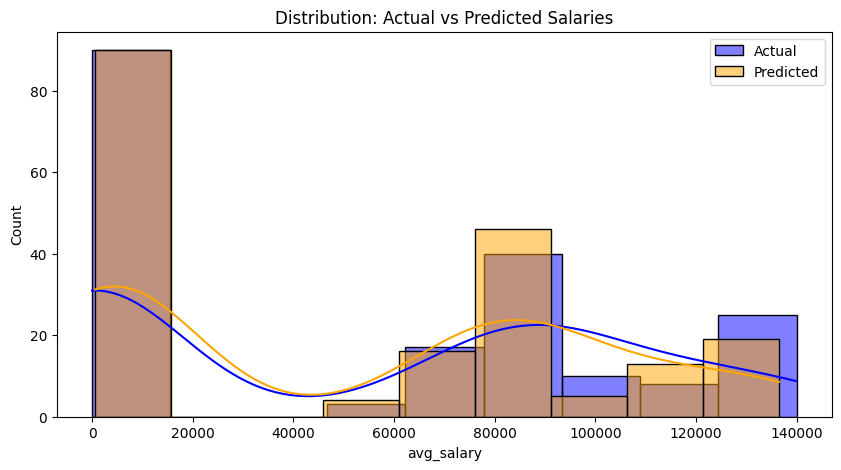

In [63]:
plt.figure(figsize=(10,5))
sns.histplot(y_val_eval, color='blue', label='Actual', kde=True)
sns.histplot(y_pred_eval, color='orange', label='Predicted', kde=True)
plt.legend()
plt.title("Distribution: Actual vs Predicted Salaries")
plt.show()


##Country importance in the prediction of salaries.

In [64]:
country_features = [col for col in X_train.columns if col.startswith('Country')]
print(country_features)


['Country_Canada', 'Country_USA']


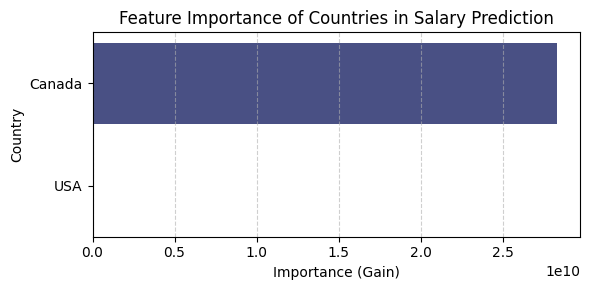

In [65]:

country_features = ['Country_Canada', 'Country_USA']

# Get importance scores from your trained model
booster = xgb_eval.get_booster()

importance = booster.get_score(importance_type='gain')
country_importance = {feat: importance.get(feat, 0) for feat in country_features}

# Convert to DataFrame
country_df = pd.DataFrame(list(country_importance.items()), columns=['Country_Feature', 'Importance'])

# Clean labels for plotting
country_df['Country'] = country_df['Country_Feature'].str.replace('Country_', '', regex=False)

# Sort by importance descending
country_df = country_df.sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(6,3))
sns.barplot(data=country_df, x='Importance', y='Country', hue='Country', palette='mako', legend=False)
plt.title('Feature Importance of Countries in Salary Prediction')
plt.xlabel('Importance (Gain)')
plt.ylabel('Country')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


##Let us deal with SHAP

In [66]:
explainer = shap.TreeExplainer(xgb_eval)

X_sample = X_train.sample(100, random_state=42)
shap_values = explainer.shap_values(X_sample)

##SHAP shows how much a feature impacts the prediction. This is much more accurate and consistent. Fair and handles multicollinearity better.

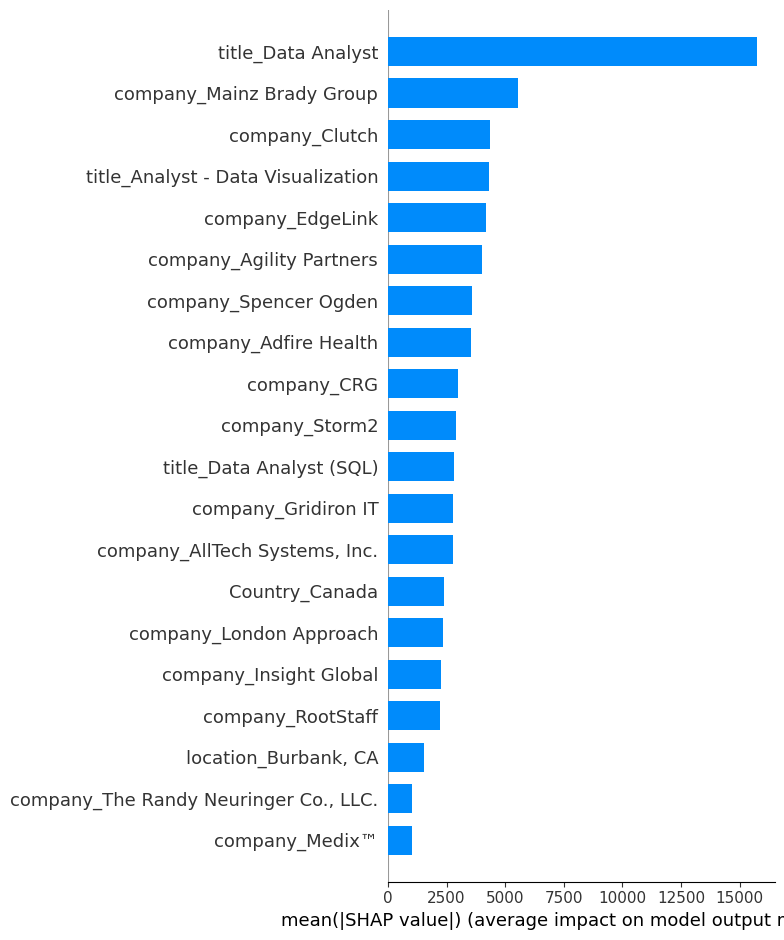

In [67]:

shap.summary_plot(shap_values, X_sample, plot_type="bar")


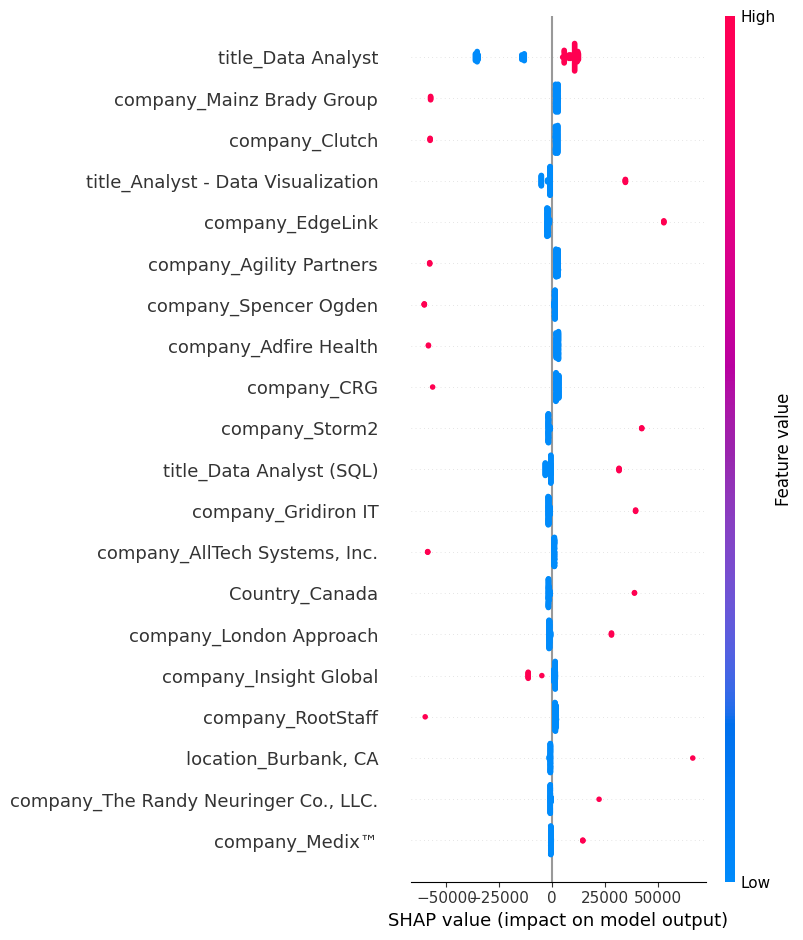

In [68]:

shap.summary_plot(shap_values, X_sample)


In [69]:
df

,title,company,description,onsite_remote,location,criteria,posted_date,link,Country,min_salary,max_salary
0,Data Analyst,Axonify,Axonify is an intelligent workforce enablement...,onsite,"Waterloo, Ontario, Canada","[{'Seniority level': 'Entry level'}, {'Employm...",2022-10-24,https://ca.linkedin.com/jobs/view/data-analyst...,Canada,82021,88856
1,Data Analyst,B3 Systems,The ideal candidate will use their passion for...,onsite,"Toronto, Ontario, Canada",[{'Employment type': 'Full-time'}],2022-11-18,https://ca.linkedin.com/jobs/view/data-analyst...,Canada,82021,88856
2,Data Analyst,Wood Mackenzie,Company DescriptionWood Mackenzie is the globa...,onsite,"Calgary, Alberta, Canada","[{'Seniority level': 'Associate'}, {'Employmen...",2022-11-18,https://ca.linkedin.com/jobs/view/data-analyst...,Canada,82021,88856
3,Data Analyst,LOFT Community Services,1 Part Time Permanent PositionDATE: November 1...,onsite,"Toronto, Ontario, Canada",[{'Employment type': 'Part-time'}],2022-11-17,https://ca.linkedin.com/jobs/view/data-analyst...,Canada,82021,88856
4,Data Analyst,NAM Info Inc,"Position: Data AnalystWork Locations: Toronto,...",onsite,"Toronto, Ontario, Canada","[{'Seniority level': 'Mid-Senior level'}, {'Em...",2022-11-08,https://ca.linkedin.com/jobs/view/data-analyst...,Canada,82021,88856
...,...,...,...,...,...,...,...,...,...,...,...
8485,BI Data Analyst,Mindworx Consulting and Academy,12-Month Renewable ContractJob PurposeTo ensur...,hybrid,Johannesburg Metropolitan Area,[{'Employment type': 'Contract'}],2022-11-23,https://za.linkedin.com/jobs/view/bi-data-anal...,Africa,14327,15521
8486,Data Analysis and Data Expert,Orange Business Services,Responsibilities: Ensure accuracy and data qua...,hybrid,"Cairo, Egypt","[{'مستوى الأقدمية': 'مستوى متوسط الأقدمية'}, {...",2022-11-15,https://eg.linkedin.com/jobs/view/data-analysi...,Africa,14327,15521
8487,Web Data Analyst,"Niufitel, S.L.",Digital Data AnalystA brand-new and exciting o...,hybrid,"South East, South-East District, Botswana","[{'Seniority level': 'Entry level'}, {'Employm...",2022-11-13,https://bw.linkedin.com/jobs/view/web-data-ana...,Africa,14327,15521
8488,ETL and Data Quality Analyst,Vodafone,Role PurposeThe role is key for sourcing data ...,hybrid,"Accra, Greater Accra Region, Ghana","[{'Seniority level': 'Not Applicable'}, {'Empl...",2022-11-22,https://gh.linkedin.com/jobs/view/etl-and-data...,Africa,14327,15521


###We can see the data types of the values as object types. Therefore we can change their respective data types to their usual type such that it becomes efficient and compatible for us to use it in Power BI or any modeling or visualization process.

In [70]:
#string conversion
string_columns = [
    'title', 'company', 'description', 'onsite_remote',
    'location', 'criteria', 'link', 'Country'
]
df[string_columns] = df[string_columns].astype('string')

#Converting the posted_date to datetime type
df['posted_date'] = pd.to_datetime(df['posted_date'], errors='coerce')

#Conversion of salary columns to integer
df['min_salary'] = df['min_salary'].astype('Int64')
df['max_salary'] = df['max_salary'].astype('Int64')


###Lets check for missing values in the whole table

In [71]:
missing_counts = df.isnull().sum()
missing_percent = (df.isnull().mean() * 100.00).round(2)

missing_df = pd.DataFrame({
    'Missing Count': missing_counts,
    'Missing %': missing_percent
})

missing_df = missing_df[missing_df['Missing Count'] > 0]  # Only show columns with missing values
missing_df.sort_values('Missing Count', ascending=False)


,Missing Count,Missing %


In [72]:
missing_df_all = pd.DataFrame({
    'Missing Count': df.isnull().sum(),
    'Missing %': (df.isnull().mean() * 100).round(2)
})
print(missing_df_all)


               Missing Count  Missing %
title                      0        0.0
company                    0        0.0
description                0        0.0
onsite_remote              0        0.0
location                   0        0.0
criteria                   0        0.0
posted_date                0        0.0
link                       0        0.0
Country                    0        0.0
min_salary                 0        0.0
max_salary                 0        0.0


##Therefore, with all the missing values ,null values and duplicate values have been checked, and making sure that the data is clean, we can move to the next stage i.e, data visualisation using Power bi. Hence we can export this dataset as a csv file to work on power bi.

In [73]:
df['min_salary'].unique()

<IntegerArray>
[ 82021,  28102,  10912,  85512,  30807, 135000,  24408,  13618,   7218,
    135,  84085,  29381,  12191,  65500,  -1094,  12544,  65737, 100000,
  76025,  50000,   5800,     50,  55000,  18027,  70732,     30,  80000,
  73005, 120000,  85000,     40,  60000, 125000,  70000,  15754,     60,
     38,  65000,  54949,  75000,  69056,  28753,  18280,  69305,   8542,
  90000,  72402,  73036,   2773,     22, 130000,     28,     35,  14327,
   3157,  27326,     68,   6758]
Length: 58, dtype: Int64

##We can see the negative salary in the minimum salary column. This happens If the original salary column had unexpected formats.If training data includes very low salaries, the model might extrapolate and go negative for some missing entries.XGBoost can predict negative values if:
* ### There's no constraint on the output

* ### Some feature combinations in the missing-salary rows push the model below zero

In [74]:
df[df['min_salary']<0]

,title,company,description,onsite_remote,location,criteria,posted_date,link,Country,min_salary,max_salary
2680,Sr. Data Analyst,Robert Half,DescriptionOur client is looking for an Interm...,hybrid,"Toronto, Ontario, Canada","[{'Seniority level': 'Mid-Senior level'}, {'Em...",2022-10-28,https://ca.linkedin.com/jobs/view/sr-data-anal...,Canada,-1094,-1185


##As the affected row is only one, we can remove it but we cannot risk losing one data point.Therefore, we go for refilling the row using the median of similiar row salary.

In [75]:
similar = df[(df['title'].str.contains('Sr. Data Analyst', case=False)) & (df['Country'] == 'Canada')]
df.loc[2680, 'min_salary'] = similar['min_salary'].median()
df.loc[2680, 'max_salary'] = similar['max_salary'].median()


In [76]:
print(df.loc[2680])

title                                             Sr. Data Analyst
company                                                Robert Half
description      DescriptionOur client is looking for an Interm...
onsite_remote                                               hybrid
location                                  Toronto, Ontario, Canada
criteria         [{'Seniority level': 'Mid-Senior level'}, {'Em...
posted_date                                    2022-10-28 00:00:00
link             https://ca.linkedin.com/jobs/view/sr-data-anal...
Country                                                     Canada
min_salary                                                   30807
max_salary                                                   33375
Name: 2680, dtype: object


In [77]:
#Lets add a column for index
df.reset_index(drop=True, inplace=True)
df['Row_ID'] = df.index + 1


In [78]:
cols = ['Row_ID'] + [col for col in df.columns if col != 'Row_ID']
df = df[cols]

In [79]:
df.to_csv('linkedin_data_analysts.csv', index=False)
